In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv('train_ctrUa4K.csv')

In [3]:
data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
data.shape

(614, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Exploratory Data Analysis

#Finding categorical and numerical fgeatures

In [10]:
categorical_features=[features for features in data.columns if data[features].dtypes=="O" and features !='Loan_Status']

In [11]:
categorical_features

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [12]:
numerical=[features for features in data.columns if data[features].dtypes!="O" and features !='Loan_Status' and  features !='Credit_History']

In [13]:
numerical

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [14]:
#%null values in object columns 
object_nan = [feature for feature in data.columns if data[feature].isnull().sum()>1 and data[feature].dtypes=='O']

for features in object_nan:
    print("{}:{} % missing values".format(features,np.round(data[features].isnull().mean(),4)))

Gender:0.0212 % missing values
Married:0.0049 % missing values
Dependents:0.0244 % missing values
Self_Employed:0.0521 % missing values


In [15]:
#%null values in categorical columns 
numerical_nan = [feature for feature in data.columns if data[feature].isnull().sum()>1 and data[feature].dtypes!='O']

for features in numerical_nan:
    print("{}:{} % missing values".format(features,np.round(data[features].isnull().mean(),4)))

LoanAmount:0.0358 % missing values
Loan_Amount_Term:0.0228 % missing values
Credit_History:0.0814 % missing values


array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>]],
      dtype=object)

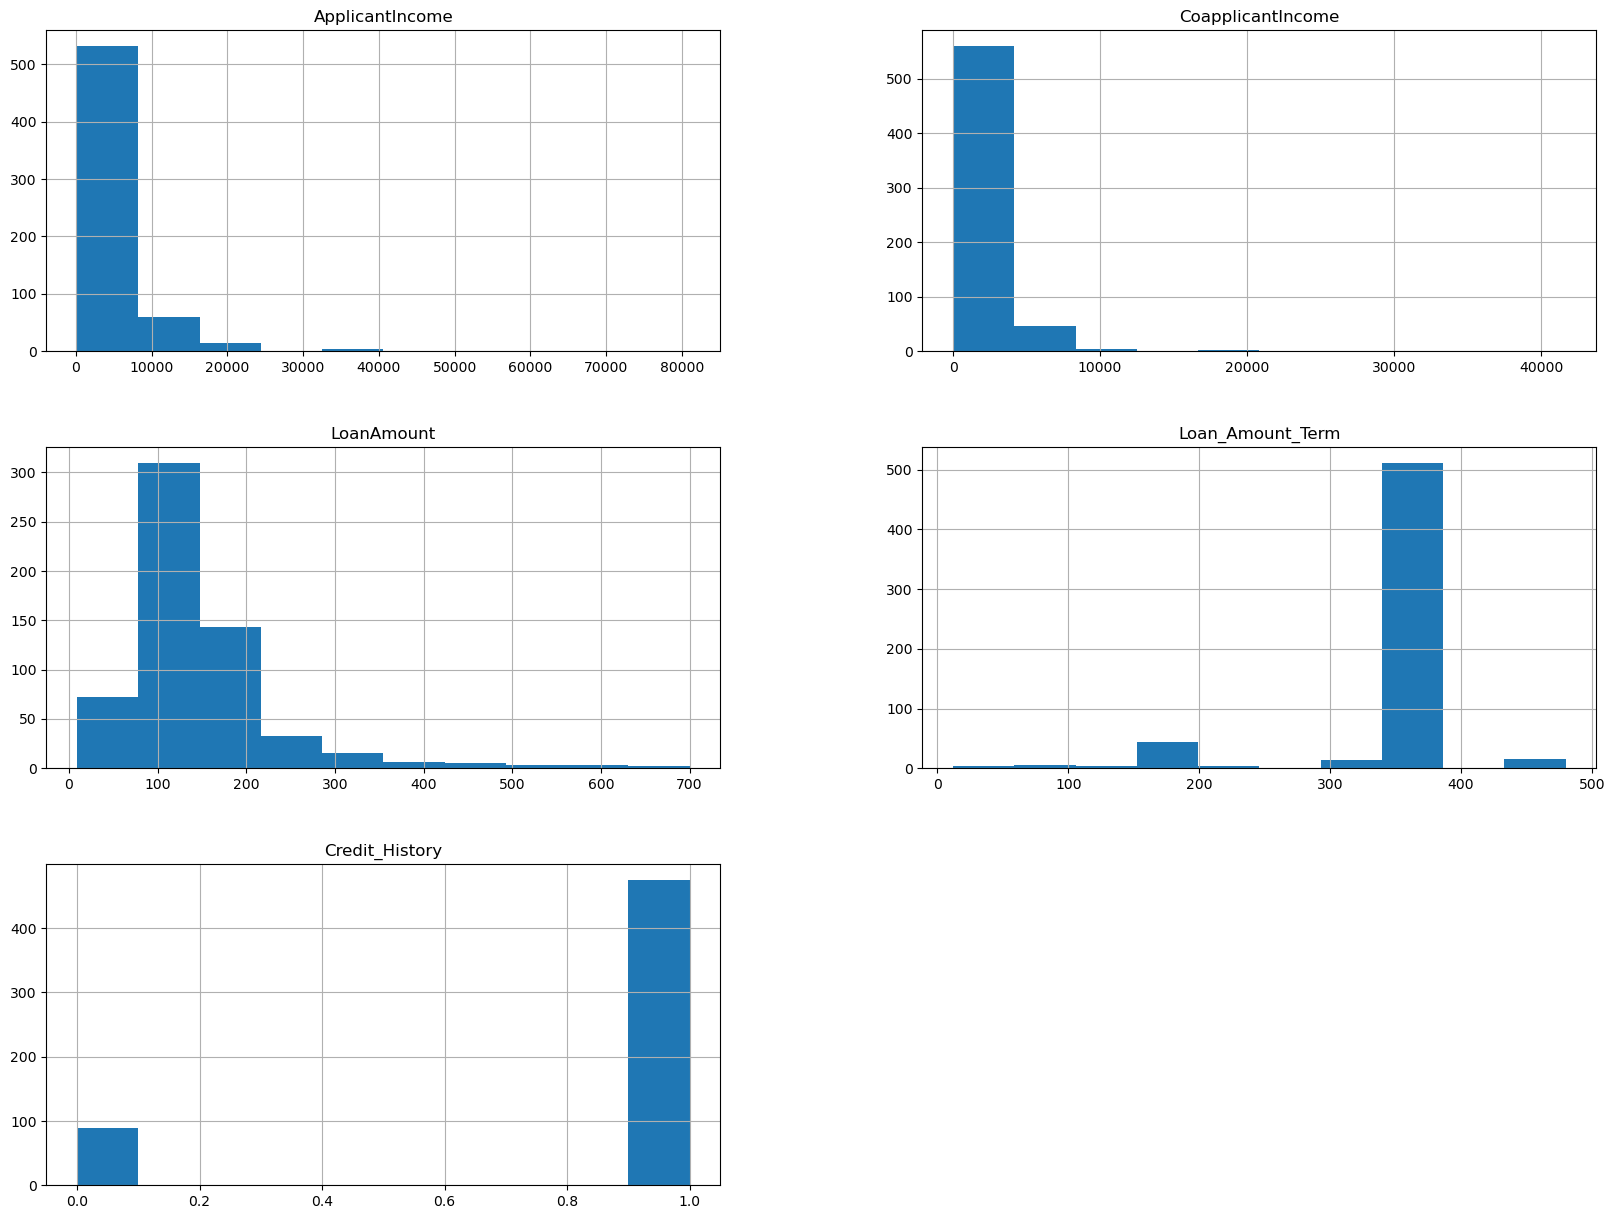

In [16]:
freqgraph=data.select_dtypes(include=["float",'int'])
freqgraph.hist(figsize=(20,15))


C:\Users\munee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


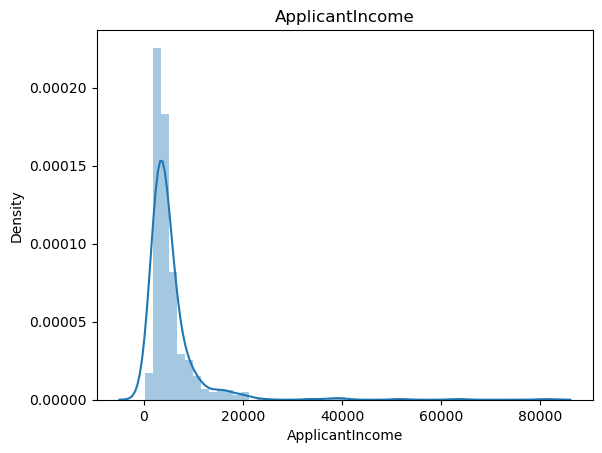

C:\Users\munee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


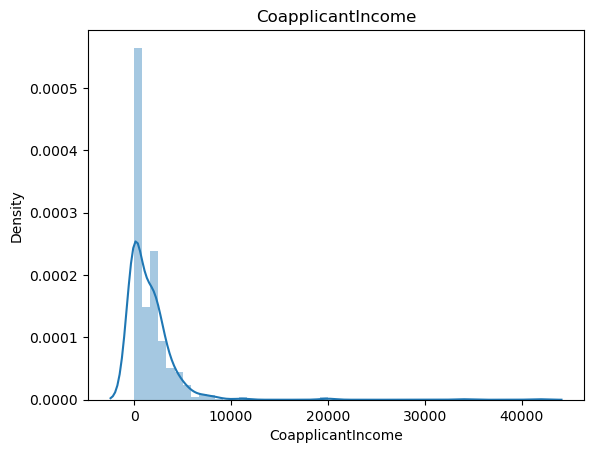

C:\Users\munee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


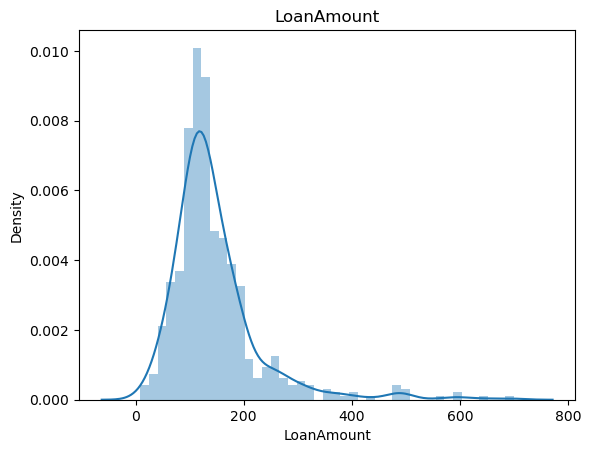

C:\Users\munee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


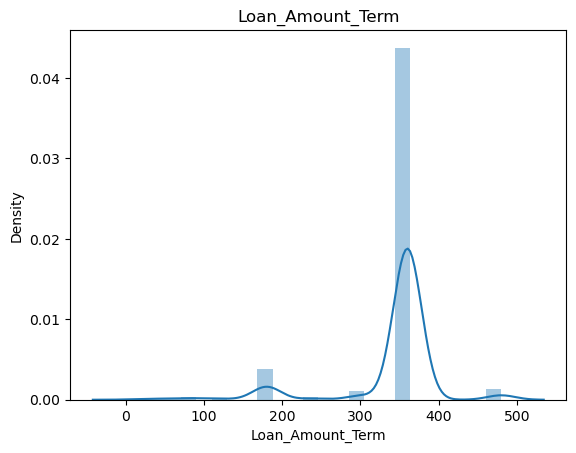

In [17]:
for i in numerical:
    sns.distplot(data[i])
    plt.title(i)
    plt.show()

##### Displots are also showing that the distribution are right skewed for 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'

##### Also showing that the distribution left skewed for  'Loan_Amount_Term'

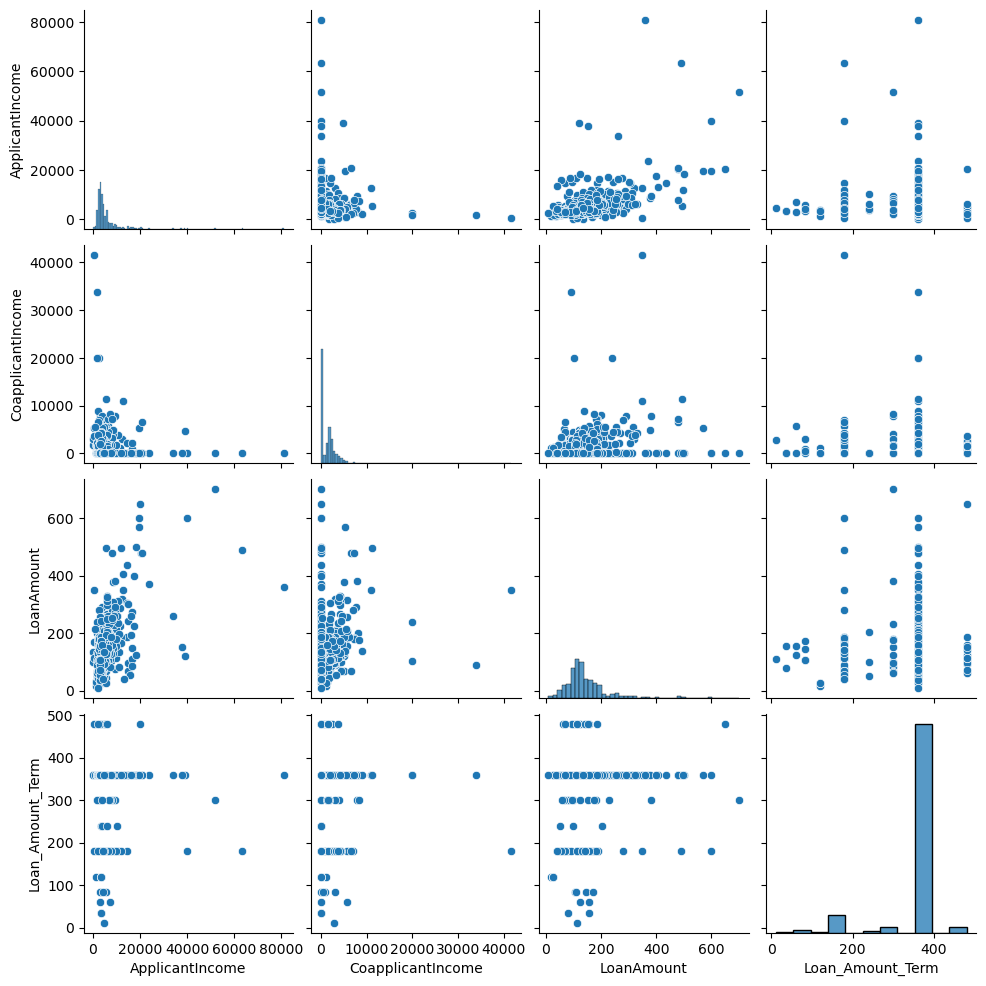

In [18]:
slice_data=data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]

sns.pairplot(slice_data)
plt.show()

#### from the pair plot above clear linear realtionship cannot be inferred

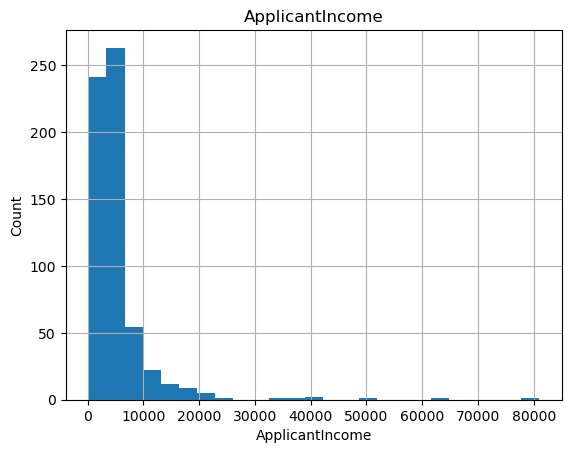

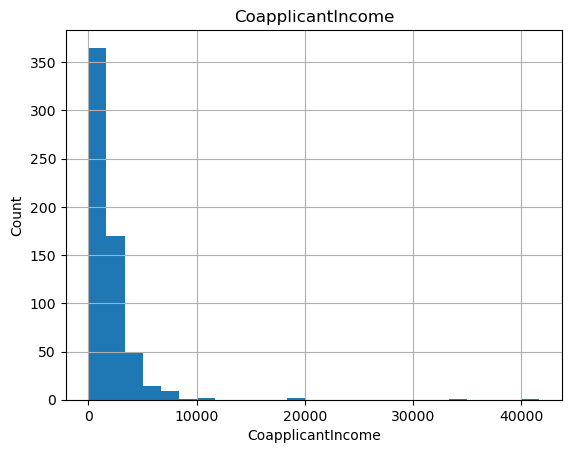

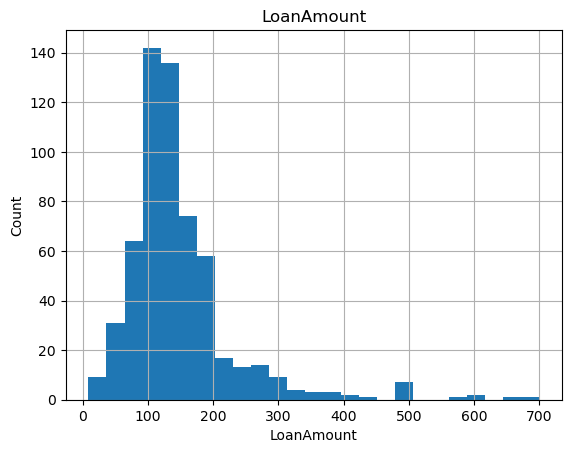

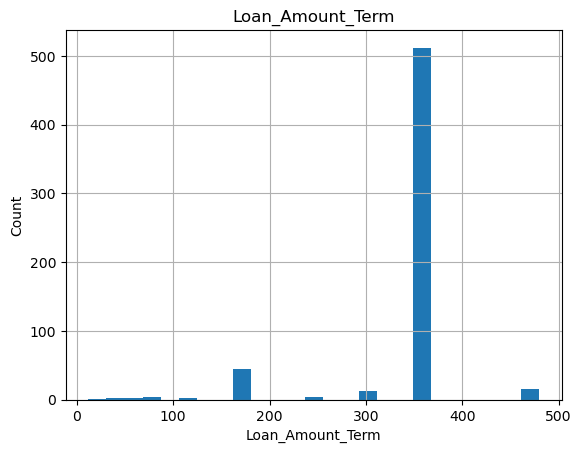

In [19]:
# Plotting histogram for numerical continuous features:
# it shows the skewnwss of data through observational method
for feature in numerical:
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

###### the columns 'ApplicantIncome', 'CoapplicantIncome','LoanAmount' all seem to be right skewed

###### But Loan_Amount_Term' seem to be left skewed

### Preprocessing

### Filling Missing values

In [20]:
# Filling the missing columns with median 

for i in ['LoanAmount']:
    data[i] = data[i].fillna(data[i].median())
    
         
# Filling the missing columns with mode

for i in ['Dependents', 'Self_Employed', 'Credit_History', 'Married', 'Gender', 'Loan_Amount_Term']:
    data[i] = data[i].fillna(data[i].mode()[0])

In [21]:
data['Loan_Amount_Term'].unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [22]:
data['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [23]:
data['LoanAmount'].unique()# fill with median

array([128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70., 109.,
       200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315., 116.,
       112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320., 144.,
       184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97., 135.,
       180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187., 113.,
       176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,  25.,
       137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,  85.,
       259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242., 129.,
        30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87., 101.,
       495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,  90.,
       166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,  42.,
       280., 140., 155., 123., 279., 192., 304., 330., 150., 207., 436.,
        78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300., 376.,
       117.,  71., 490., 173.,  46., 228., 308., 23

In [24]:
data['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [25]:
data['Credit_History'].unique()

array([1., 0.])

In [26]:
data['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [27]:
data['CoapplicantIncome'].unique()

array([0.00000000e+00, 1.50800000e+03, 2.35800000e+03, 4.19600000e+03,
       1.51600000e+03, 2.50400000e+03, 1.52600000e+03, 1.09680000e+04,
       7.00000000e+02, 1.84000000e+03, 8.10600000e+03, 2.84000000e+03,
       1.08600000e+03, 3.50000000e+03, 5.62500000e+03, 1.91100000e+03,
       1.91700000e+03, 2.92500000e+03, 2.25300000e+03, 1.04000000e+03,
       2.08300000e+03, 3.36900000e+03, 1.66700000e+03, 3.00000000e+03,
       2.06700000e+03, 1.33000000e+03, 1.45900000e+03, 7.21000000e+03,
       1.66800000e+03, 1.21300000e+03, 2.33600000e+03, 3.44000000e+03,
       2.27500000e+03, 1.64400000e+03, 1.16700000e+03, 1.59100000e+03,
       2.20000000e+03, 2.25000000e+03, 2.85900000e+03, 3.79600000e+03,
       3.44900000e+03, 4.59500000e+03, 2.25400000e+03, 3.06600000e+03,
       1.87500000e+03, 1.77400000e+03, 4.75000000e+03, 3.02200000e+03,
       4.00000000e+03, 2.16600000e+03, 1.88100000e+03, 2.53100000e+03,
       2.00000000e+03, 2.11800000e+03, 4.16700000e+03, 2.90000000e+03,
      

In [28]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [29]:
#### Plotting heatmap and finding the Correlation between features

<AxesSubplot:>

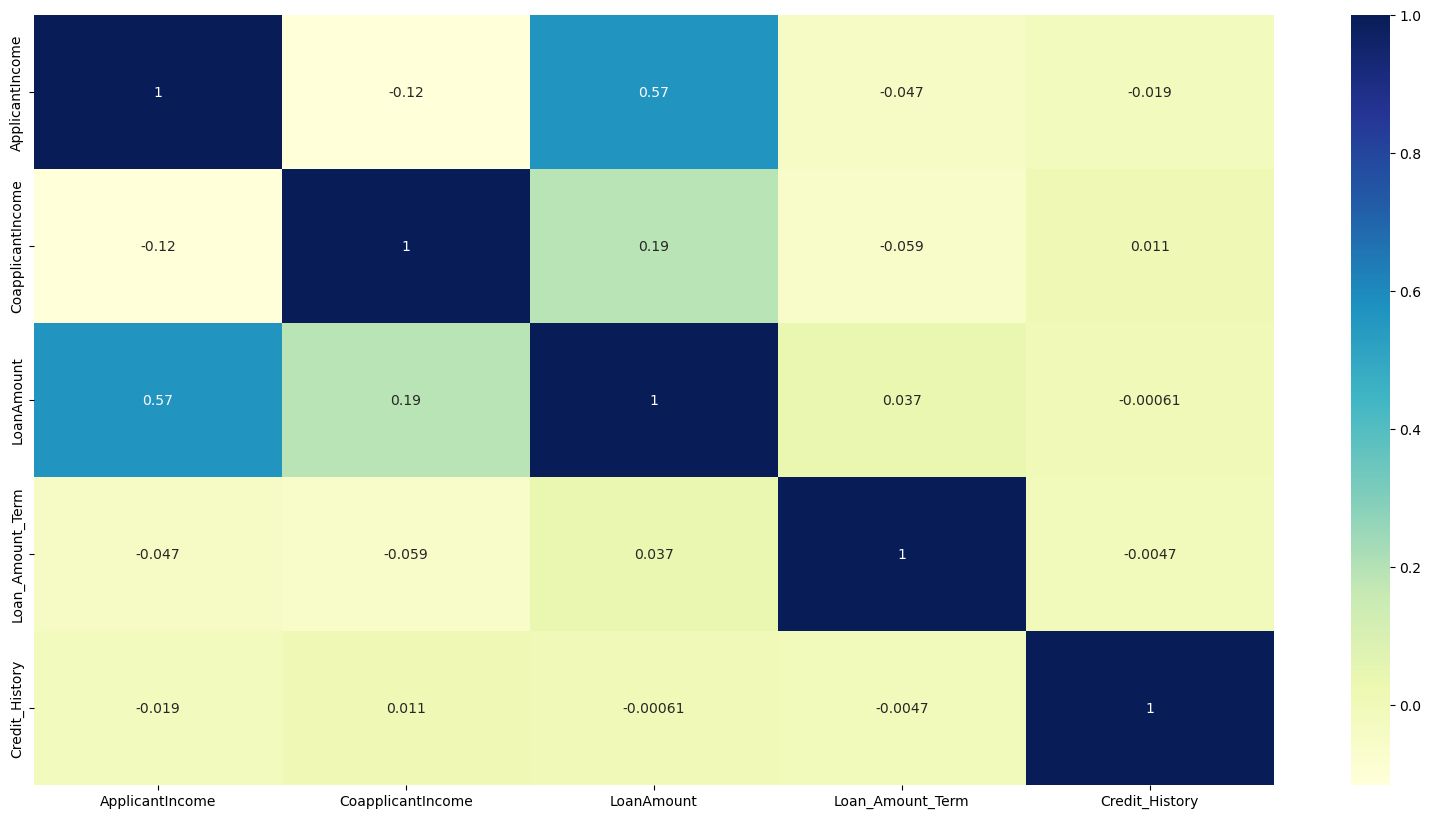

In [30]:
corrmatrix = data.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corrmatrix,annot=True,cmap = 'YlGnBu')

##### Maximun correlation is seem between loanamount and Apllicant Income of 0.57
##### Also a slighted correlation of 0.19 is seem between Coapplicant income and loam amount
##### No features are highly correlated with each other so based on this no feature reduction can be done


#### Checking the skewness


In [31]:
for i in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']:
    data_skew=data[i].skew()
    print(data_skew)
#positively skewd data can be converted to a gaussian cureve using logtransformation or sqrt method

#But with negatively skewed data this is not apt

6.539513113994625
7.491531216657306
2.743052748820892
-2.4021122563890396


In [32]:

#Skewness is bad for our data and many machine learning algorithms prefer or perform better when numerical data has a normal distribution 
#we need a way to remove this skewness, to do so in python most frequently used methods are PowerTransformer and QuantileTransformer. 
#Both these methods are used to get a normal or Gaussian-like distribution. 

In [33]:

from sklearn.preprocessing import PowerTransformer, QuantileTransformer


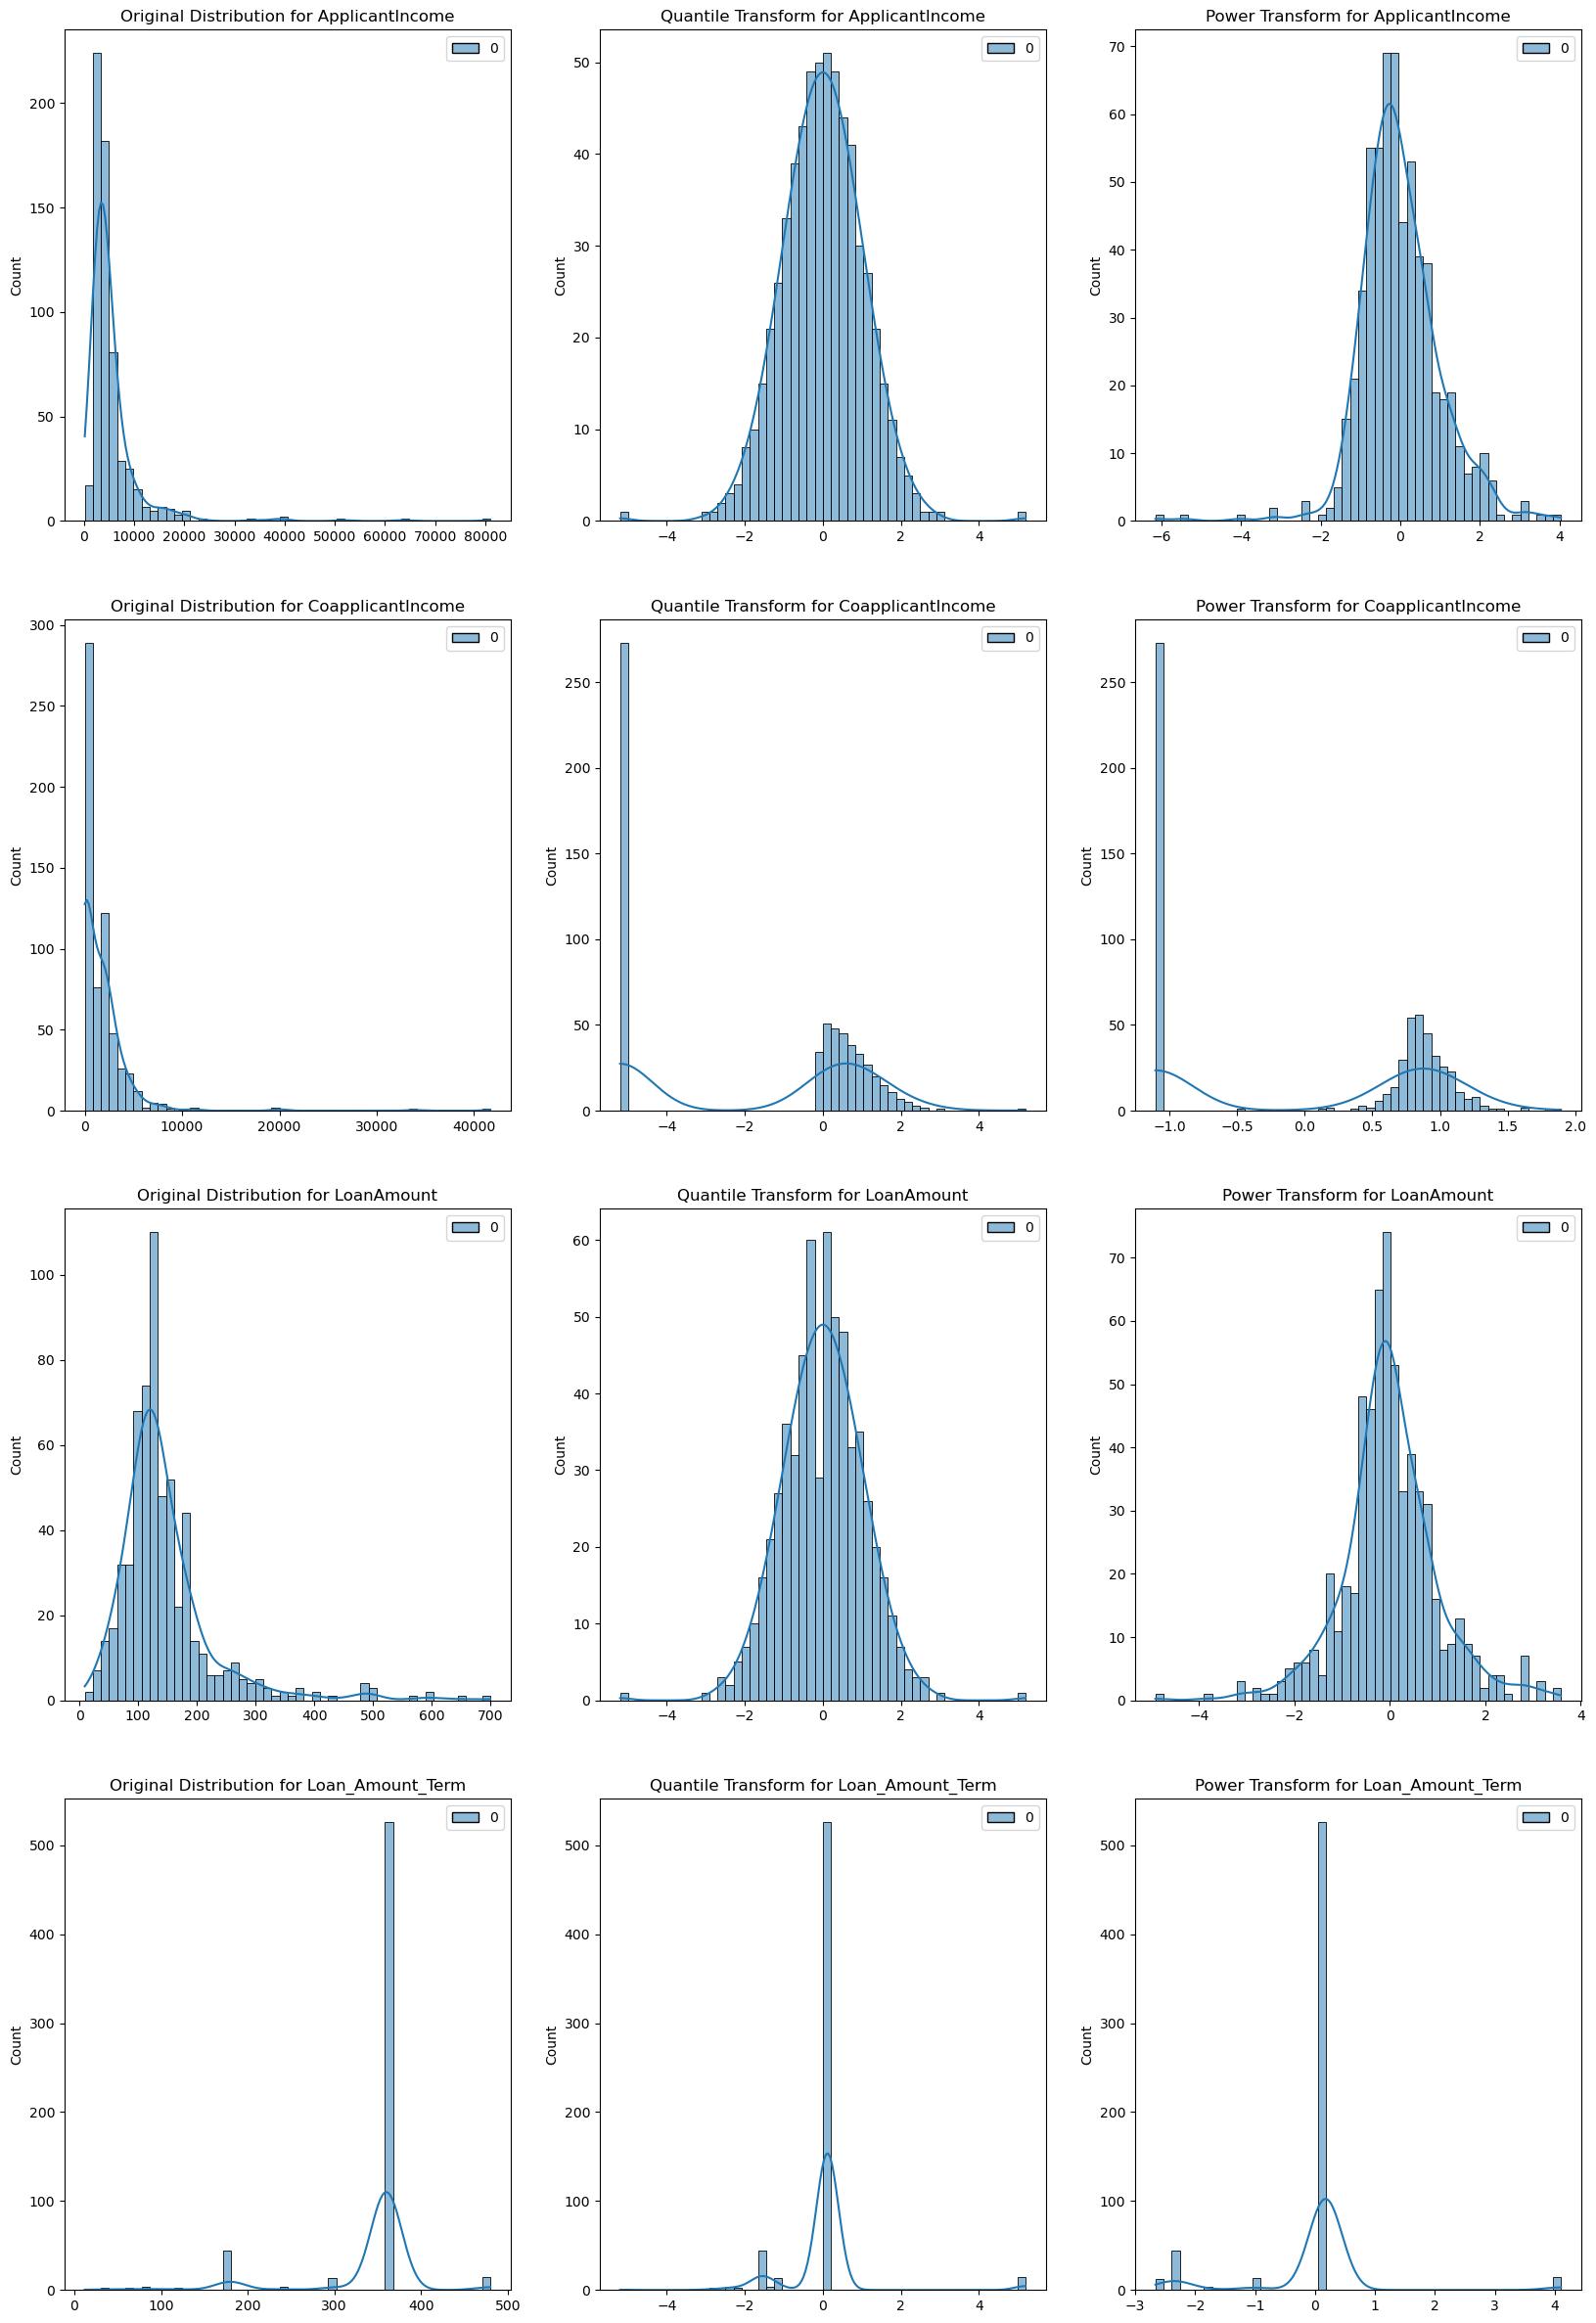

In [34]:
cols1 = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
def test_transformers(columns):
    pt = PowerTransformer()
    qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
    fig = plt.figure(figsize=(20,30))
    j = 1
    for i in columns:
        array = np.array(data[i]).reshape(-1, 1)
        y = pt.fit_transform(array)
        x = qt.fit_transform(array)
        plt.subplot(4,3,j)
        sns.histplot(array, bins = 50, kde = True)
        plt.title(f"Original Distribution for {i}")
        plt.subplot(4,3,j+1)
        sns.histplot(x, bins = 50, kde = True)
        plt.title(f"Quantile Transform for {i}")
        plt.subplot(4,3,j+2)
        sns.histplot(y, bins = 50, kde = True)
        plt.title(f"Power Transform for {i}")      
        j += 3
        data[i]=x
test_transformers(cols1)

In [35]:
for i in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']:
    data_skew=data[i].skew()
    print(data_skew)
#positively skewd data can be converted to a gaussian cureve using logtransformation or sqrt method

#But with negatively skewed data this is not apt

-0.005627414484905382
-0.13153229133901018
-0.0009375082605279191
2.34634627939854


In [36]:
data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [37]:
data=data.drop('Loan_ID',axis=1)# dropping the Loan Id column witha ll unique values as it will not contribute much to the model

#### Ploting boxplot and finding outliers

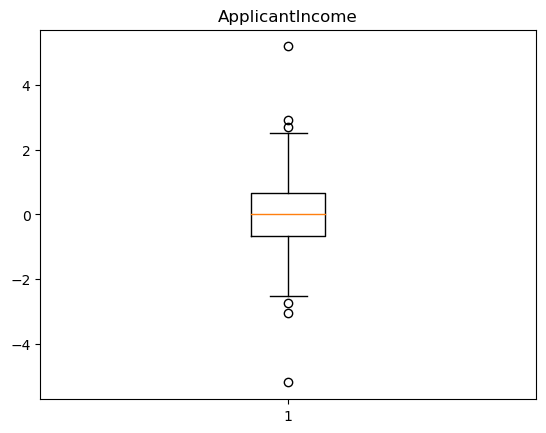

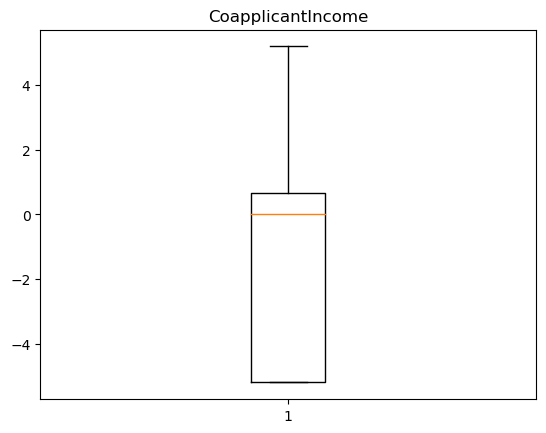

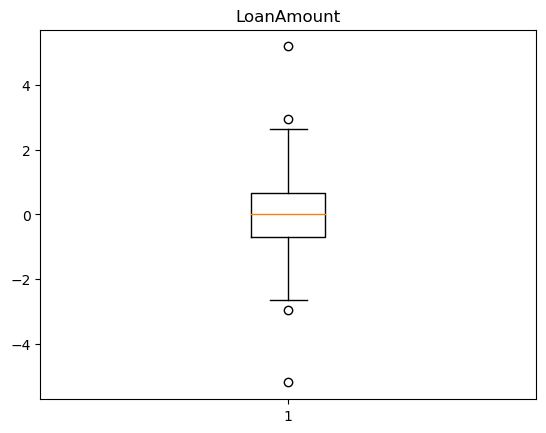

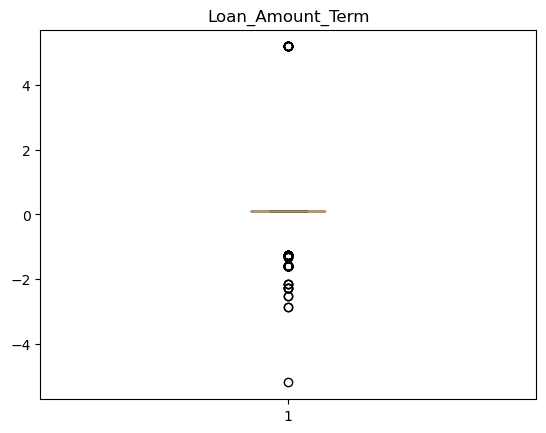

In [38]:
for features in numerical:
        plt.boxplot(data[features])
        plt.title(features)
        plt.show()
        

#There are ouliers for the numerical features





### Label encoding

In [39]:
from sklearn.preprocessing import  LabelEncoder

le=LabelEncoder()


In [40]:
for i in ['Self_Employed','Loan_Status','Dependents','Self_Employed','Education','Married','Gender','Property_Area']:
    data[i]=le.fit_transform(data[i])

In [41]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.705536,-5.199338,0.020095,0.118323,1.0,2,1
1,1,1,1,0,0,0.311381,0.133321,0.020095,0.118323,1.0,0,0
2,1,1,0,0,1,-0.566370,-5.199338,-1.482240,0.118323,1.0,2,1
3,1,1,0,1,0,-0.891342,0.717594,-0.210000,0.118323,1.0,2,1
4,1,0,0,0,0,0.747255,-5.199338,0.356531,0.118323,1.0,2,1


### Scaling- MinMax

In [42]:
data1=data.drop(['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'],axis=1)

In [43]:
data2=data[['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']]

In [44]:
data1.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
minmax=MinMaxScaler(feature_range= (0,1))
data3=minmax.fit_transform(data1)

In [47]:
data3=pd.DataFrame(data3, columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History'])

In [48]:
data3


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.567849,0.000000,0.501932,0.511379,1.0
1,0.529944,0.512821,0.501932,0.511379,1.0
2,0.445534,0.000000,0.357459,0.511379,1.0
3,0.414283,0.569008,0.479805,0.511379,1.0
4,0.571861,0.000000,0.534286,0.511379,1.0
...,...,...,...,...,...
609,0.437287,0.000000,0.373503,0.511379,1.0
610,0.513097,0.000000,0.293857,0.345532,1.0
611,0.607072,0.487645,0.633209,0.511379,1.0
612,0.600169,0.000000,0.593937,0.511379,1.0


In [49]:
#concatenating target & encoded columns with scaled columns.
data3 =pd.concat([data2,data3], axis =1)

In [50]:
data3

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,1,0.567849,0.000000,0.501932,0.511379,1.0
1,1,1,1,0,0,0,0,0.529944,0.512821,0.501932,0.511379,1.0
2,1,1,0,0,1,2,1,0.445534,0.000000,0.357459,0.511379,1.0
3,1,1,0,1,0,2,1,0.414283,0.569008,0.479805,0.511379,1.0
4,1,0,0,0,0,2,1,0.571861,0.000000,0.534286,0.511379,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1,0.437287,0.000000,0.373503,0.511379,1.0
610,1,1,3,0,0,0,1,0.513097,0.000000,0.293857,0.345532,1.0
611,1,1,1,0,0,2,1,0.607072,0.487645,0.633209,0.511379,1.0
612,1,1,2,0,0,2,1,0.600169,0.000000,0.593937,0.511379,1.0


## Splitting Features and target

In [51]:
x=data3.drop('Loan_Status',axis=1)
y=data3['Loan_Status']

In [52]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [53]:
x_test.shape

(154, 11)

## Classification models

## LogisticRegression

In [54]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
model_logr = logr.fit (x_train ,y_train)
y_pred_logr = model_logr.predict(x_test)

In [55]:
from sklearn.metrics import confusion_matrix,accuracy_score


In [56]:
confusion_matrix(y_test,y_pred_logr)# 35 misclassifications


array([[21, 33],
       [ 2, 98]], dtype=int64)

In [57]:

accuracy_score(y_test, y_pred_logr)

0.7727272727272727

## KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier
metric_k  = []
neighbors = np.arange(3, 15)


for k in neighbors:
    knn       =  KNeighborsClassifier(n_neighbors = k)
    knn_model =  knn.fit(x_train,y_train)
    knn_pred  =  knn_model.predict(x_test)
    knn_acc   =  accuracy_score(y_test,knn_pred)
    metric_k.append(knn_acc)


C:\Users\munee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\munee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

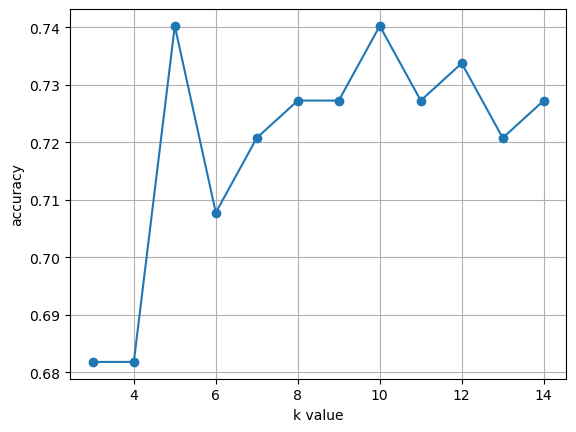

In [59]:
#plotting graph

plt.plot(neighbors, metric_k, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()


##### checking with neighbor values equal to 5 and 10 as accuracy is highest with k values 5 and 10

In [60]:
knn_5       =  KNeighborsClassifier(n_neighbors = 7)
knn_model_5 =  knn_5.fit(x_train,y_train)
knn_pred_5  =  knn_model_5.predict(x_test)
knn_pred_5

C:\Users\munee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0])

In [61]:
knn_10       =  KNeighborsClassifier(n_neighbors = 10)
knn_model_10 =  knn_10.fit(x_train,y_train)
knn_pred_10  =  knn_model_10.predict(x_test)
knn_pred_10

C:\Users\munee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [62]:
knn_5       =  KNeighborsClassifier(n_neighbors = 5)
knn_model_5 =  knn_5.fit(x_train,y_train)
knn_pred_5  =  knn_model_5.predict(x_test)
knn_pred_5

C:\Users\munee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [63]:
confusion_matrix(y_test, knn_pred)# 42 misclassifications


array([[13, 41],
       [ 1, 99]], dtype=int64)

In [64]:
accuracy_score(y_test, knn_pred)

0.7272727272727273

## SVM

In [65]:
from sklearn.svm import SVC
svm_clf= SVC(kernel='linear')
svm_model=svm_clf.fit(x_train,y_train)
y_pred_svm=svm_model.predict(x_test)

In [66]:
confusion_matrix(y_test,y_pred_svm)# 35 misclassifications


array([[21, 33],
       [ 2, 98]], dtype=int64)

In [67]:
accuracy_score(y_test,y_pred_svm)

0.7727272727272727

In [68]:
from sklearn.svm import SVC
svm_clf1= SVC(kernel='rbf')
svm_model1=svm_clf1.fit(x_train,y_train)
y_pred_svm1=svm_model1.predict(x_test)

In [69]:
confusion_matrix(y_test,y_pred_svm1)# 35 misclassifications


array([[21, 33],
       [ 2, 98]], dtype=int64)

In [70]:
accuracy_score(y_test,y_pred_svm1)

0.7727272727272727

In [71]:
from sklearn.svm import SVC
svm_clf2= SVC(kernel='poly')
svm_model2=svm_clf2.fit(x_train,y_train)
y_pred_svm2=svm_model2.predict(x_test)

In [72]:
confusion_matrix(y_test,y_pred_svm2) # 34 misclassifications

array([[22, 32],
       [ 2, 98]], dtype=int64)

In [73]:
accuracy_score(y_test,y_pred_svm2)

0.7792207792207793

### Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=42)
dt_model=dt_clf.fit(x_train,y_train)
y_pred_dt=dt_model.predict(x_test)

In [75]:
confusion_matrix(y_test,y_pred_dt) # 52 misclassifications

array([[24, 30],
       [22, 78]], dtype=int64)

In [76]:
accuracy_score(y_test,y_pred_dt)

0.6623376623376623

## Random forest 

In [77]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_model=rf_clf.fit(x_train,y_train)
y_pred_rf=rf_model.predict(x_test)

In [78]:
confusion_matrix(y_test,y_pred_rf) # 38 misclassifications

array([[24, 30],
       [ 8, 92]], dtype=int64)

In [79]:
accuracy_score(y_test,y_pred_rf)

0.7532467532467533

### Naive bayes 

In [80]:
from sklearn.naive_bayes import GaussianNB

In [81]:
gnb = GaussianNB()
model_gnb =gnb.fit(x_train,y_train)
y_pred_gnb=model_gnb.predict(x_test)


In [82]:
confusion_matrix(y_test,y_pred_gnb) # 36 misclassifications

array([[23, 31],
       [ 5, 95]], dtype=int64)

In [83]:
accuracy_score(y_test,y_pred_gnb)

0.7662337662337663

### Gradient Boosting

In [84]:
from sklearn.ensemble import GradientBoostingClassifier

In [85]:
gbk = GradientBoostingClassifier()
model_gbk = gbk.fit(x_train,y_train)
y_pred_gbk = model_gbk.predict(x_test)


In [86]:
confusion_matrix(y_test,y_pred_gbk) # 36 misclassifications

array([[22, 32],
       [ 5, 95]], dtype=int64)

In [87]:
accuracy_score(y_test,y_pred_gbk)

0.7597402597402597

## Accuracy comparison between different models :


####    1. Logistic regression :0.7727272727272727             ---77.27%

####    2. KNN : 0.7272727272727273                                    --- 72.72%

####    3. SVM with kernels

####      kernel -linear : 0.7727272727272727                          --- 77.27%
####      kernel -rbf : 0.7727272727272727                               ---- 77.27%
####      kernel polynomial :0.7792207792207793                  --- 77.92%


####    4. Decision Trees : 0.6623376623376623                       ---66.23%
####    5. Random Forest :  0.7532467532467533                      ---75.32%

####    6.Naive Bayes :0.7662337662337663                               ----76.62%
####    7.Grandient Boosting  :0.7597402597402597                 ----75.97%

## Loading test data and Preprocessing


In [88]:
data_test=pd.read_csv('test_lAUu6dG.csv')

In [89]:
test_data=data_test.copy()

In [90]:
data_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [91]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [92]:
data_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [93]:
data_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [94]:
data_test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [95]:
data_test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

#### Exploratory data Analysis

In [96]:
numerical_test=[features for features in data_test.columns if data_test[features].dtypes!="O" and  features !='Credit_History']

In [97]:
numerical_test

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [98]:
categorical_test=[features for features in data_test.columns if data_test[features].dtypes=="O" ]

In [99]:
categorical_features

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [100]:
#%null values in object columns 
object_nan = [feature for feature in data_test.columns if data_test[feature].isnull().sum()>1 and data_test[feature].dtypes=='O']

for features in object_nan:
    print("{}:{} % missing values".format(features,np.round(data_test[features].isnull().mean(),4)))

Gender:0.03 % missing values
Dependents:0.0272 % missing values
Self_Employed:0.0627 % missing values


In [101]:
#%null values in categorical columns 
numerical_nan = [feature for feature in data_test.columns if data_test[feature].isnull().sum()>1 and data_test[feature].dtypes!='O']

for features in numerical_nan:
    print("{}:{} % missing values".format(features,np.round(data_test[features].isnull().mean(),4)))

LoanAmount:0.0136 % missing values
Loan_Amount_Term:0.0163 % missing values
Credit_History:0.079 % missing values


#### Plotting Frequency Graph

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>]],
      dtype=object)

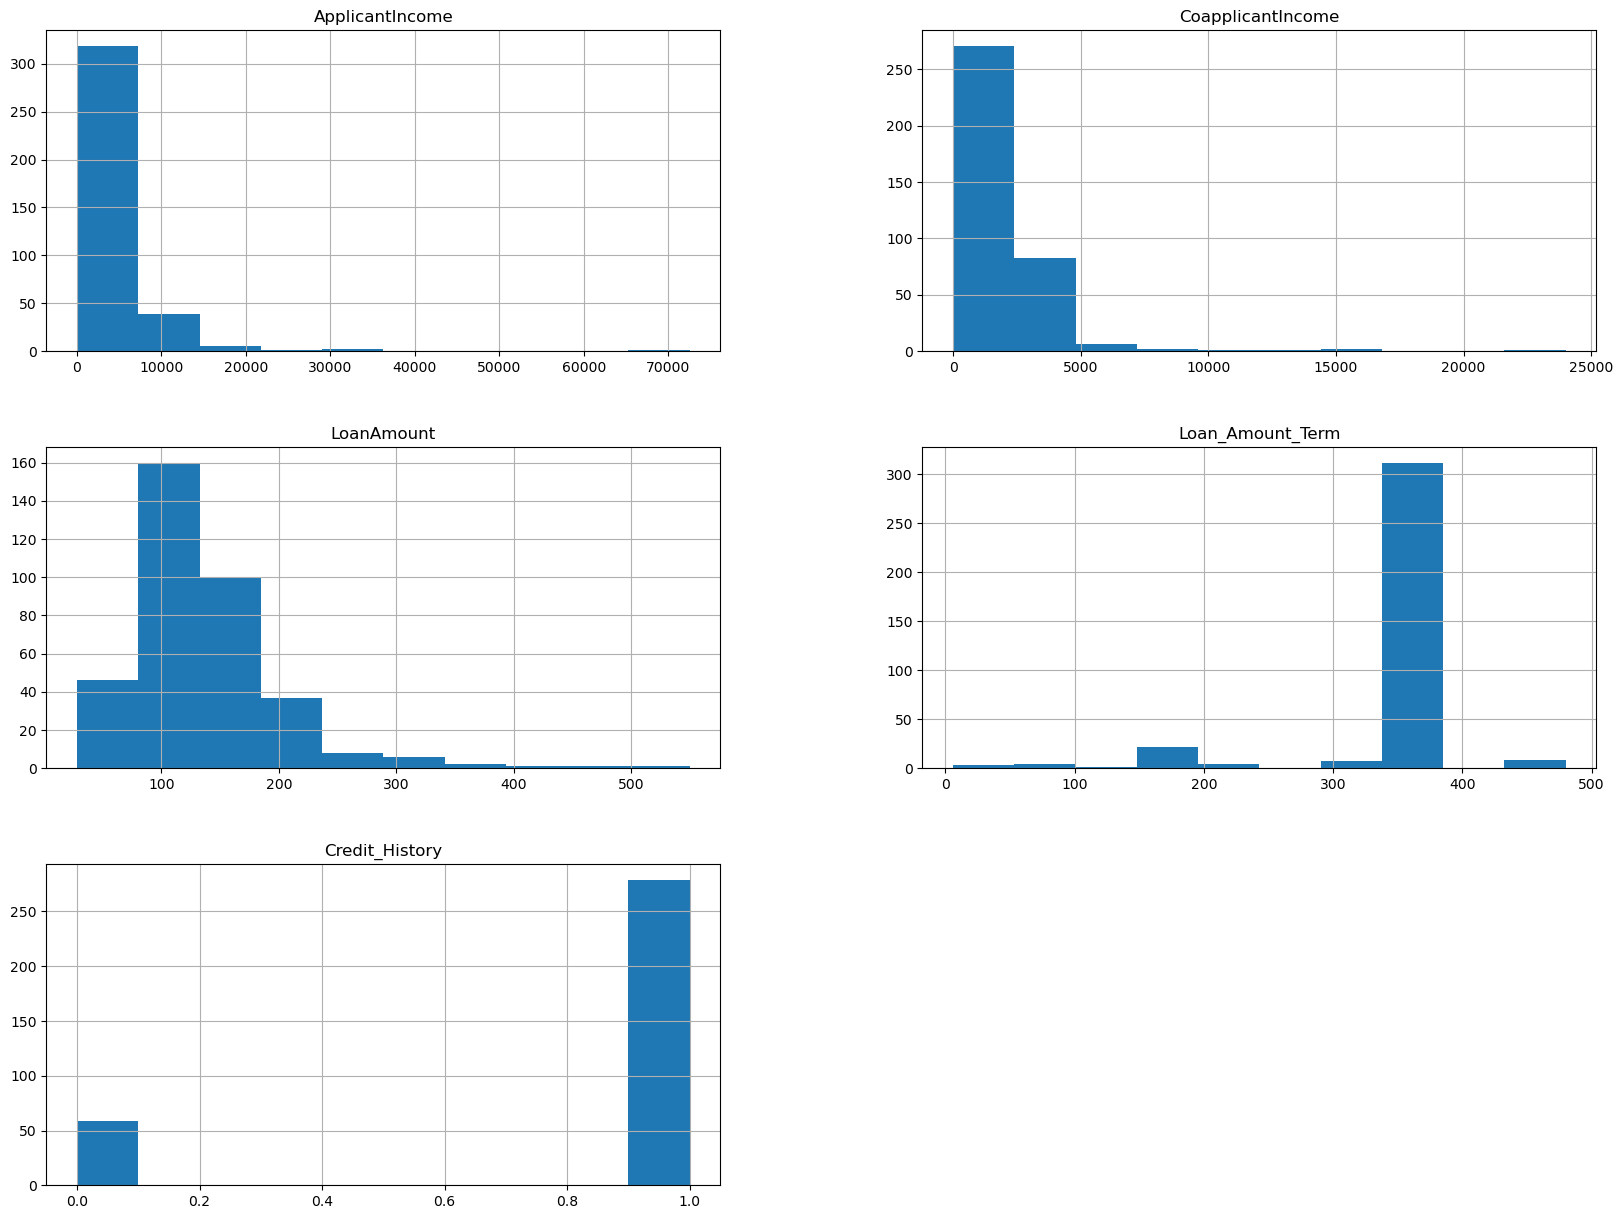

In [102]:
freqgraph=data_test.select_dtypes(include=['int',"float"])
freqgraph.hist(figsize=(20,15))

In [103]:
data_test=data_test.drop('Loan_ID',axis=1)# dropping the Loan Id column witha ll unique values as it will not contribute much to the model

#### Distplot

C:\Users\munee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


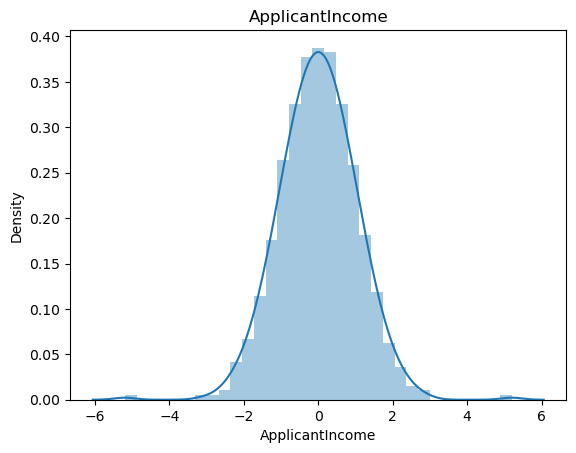

C:\Users\munee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


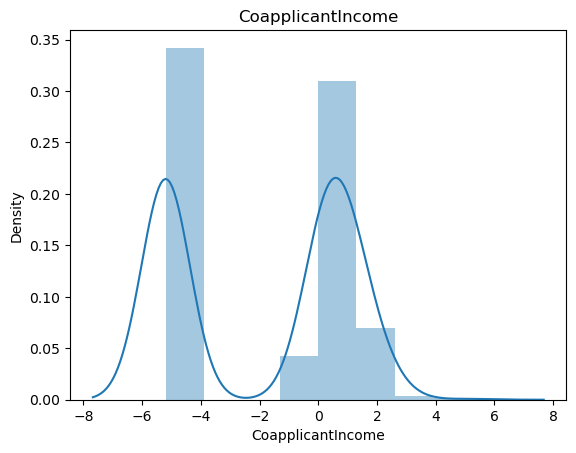

C:\Users\munee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


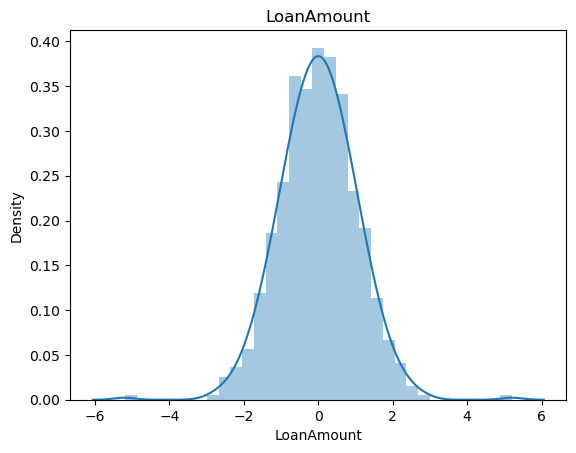

C:\Users\munee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


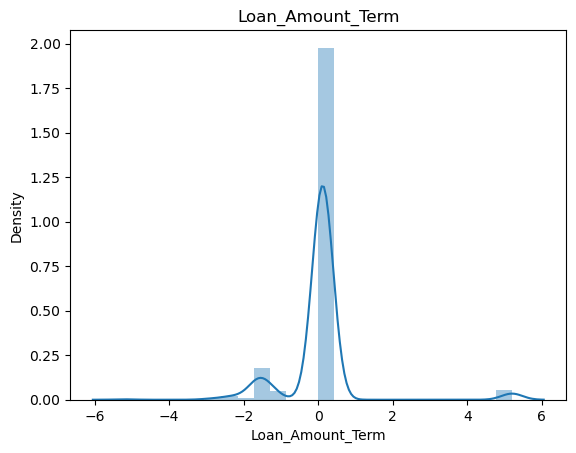

In [104]:
for i in numerical_test:
    sns.distplot(data[i])
    plt.title(i)
    plt.show()

#### PairPlot


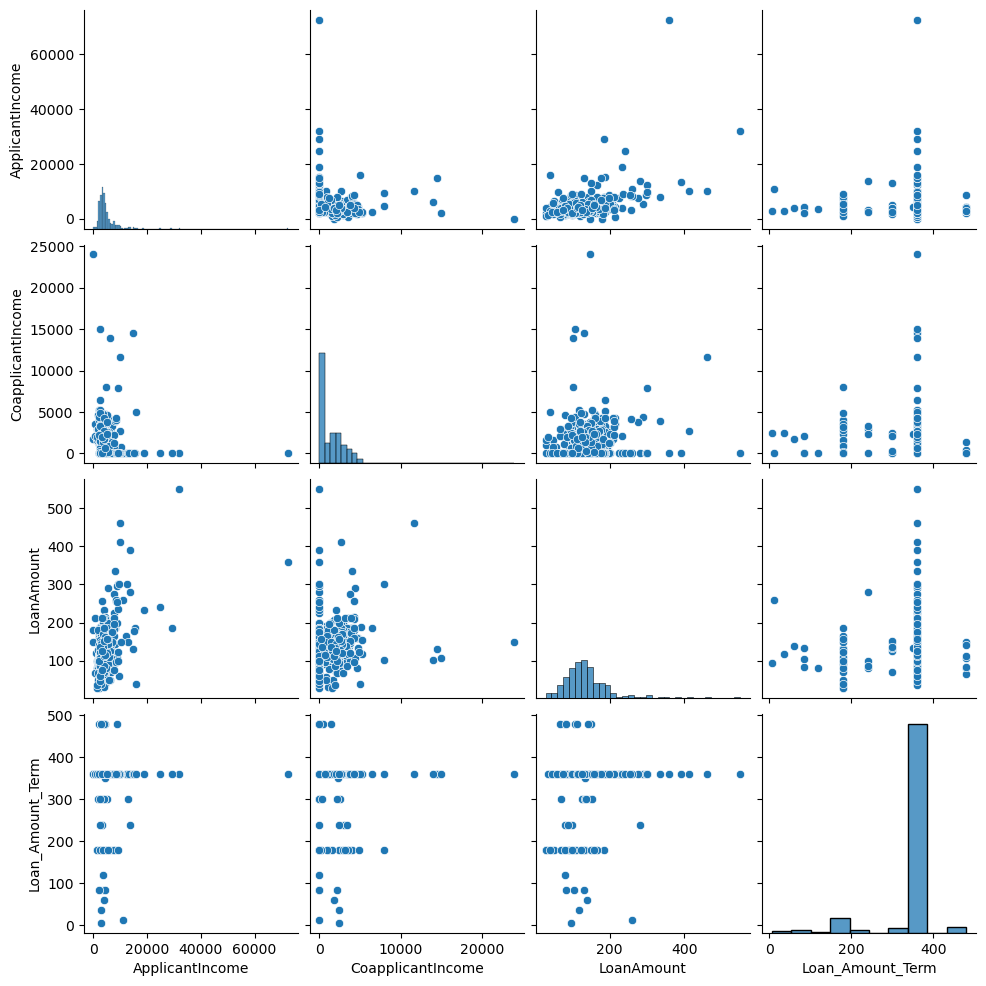

In [105]:
#PairPlot

slice_data_test=data_test[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]

sns.pairplot(slice_data_test)
plt.show()

##### Apllicant income and loan amount and coapplicant income and loan amount seem to have a slight positive correlation

### Preprocessing

#### Filling Missing values

In [106]:
# Filling the missing columns with median 

for i in ['LoanAmount']:
    data_test[i] = data_test[i].fillna(data_test[i].median())
    
         
# Filling the missing columns with mode

for i in ['Dependents', 'Self_Employed', 'Credit_History', 'Married', 'Gender', 'Loan_Amount_Term']:
    data_test[i] = data_test[i].fillna(data_test[i].mode()[0])

In [107]:
data_test['LoanAmount'].unique()# fill with median

array([110., 126., 208., 100.,  78., 152.,  59., 147., 280., 123.,  90.,
       162.,  40., 166., 124., 131., 200., 300.,  48.,  28., 101., 125.,
       290., 148., 140., 275.,  57.,  75., 192., 158., 176., 185., 116.,
       138.,  84., 108., 187., 120., 160.,  30.,  92., 130., 134., 189.,
       135., 188.,  95.,  65., 139., 232., 144., 155., 186.,  50., 163.,
       360., 149., 257., 102.,  77., 390., 256.,  61., 107., 119., 165.,
        93., 122., 157., 180.,  80., 104., 213., 146.,  71., 225.,  70.,
       132., 105.,  83., 103., 150., 550., 260., 199., 113., 117.,  72.,
       214., 133., 143., 209., 170.,  94.,  79., 159., 173., 235., 336.,
        96., 128., 412., 114., 115.,  88.,  55., 118., 212.,  74.,  66.,
        64., 142., 151.,  81., 171., 234., 184., 112.,  49.,  99., 240.,
       460., 297., 106., 141., 145., 177.,  68., 183., 121., 153.,  67.,
       181.,  35.,  46.,  87., 137., 254., 109., 197.,  85.,  60.,  76.,
        98.])

In [108]:
data_test['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [109]:
data_test['Credit_History'].unique()

array([1., 0.])

#### Plotting heatmap and finding the Correlation between features

<AxesSubplot:>

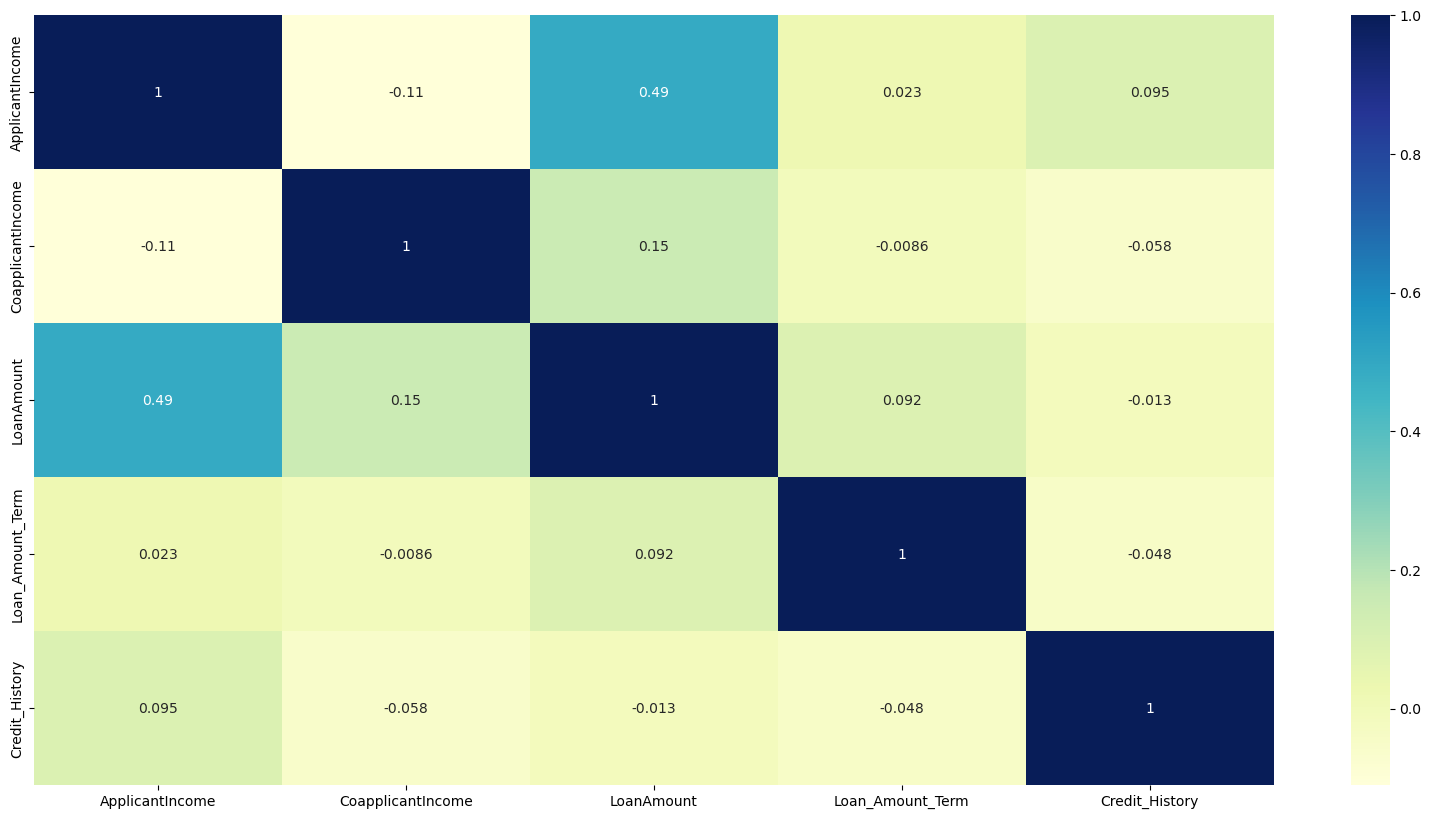

In [110]:
corrmatrix = data_test.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corrmatrix,annot=True,cmap = 'YlGnBu')

In [111]:
## No features are highly correlated witheach other so not dropping

In [112]:
for i in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']:
    data_test_skew=data_test[i].skew()
    print(data_test_skew)
#positively skewd data can be converted to a gaussian cureve using logtransformation or sqrt method

#But with negatively skewed data this is not apt

8.441374954190996
4.257356934477602
2.244600521260248
-2.709536758573826


In [113]:

from sklearn.preprocessing import PowerTransformer, QuantileTransformer


C:\Users\munee\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2590: UserWarning: n_quantiles (500) is greater than the total number of samples (367). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\munee\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2590: UserWarning: n_quantiles (500) is greater than the total number of samples (367). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\munee\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2590: UserWarning: n_quantiles (500) is greater than the total number of samples (367). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\munee\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2590: UserWarning: n_quantiles (500) is greater than the total number of samples (367). n_quantiles is set to n_samples.
  warnings.warn(


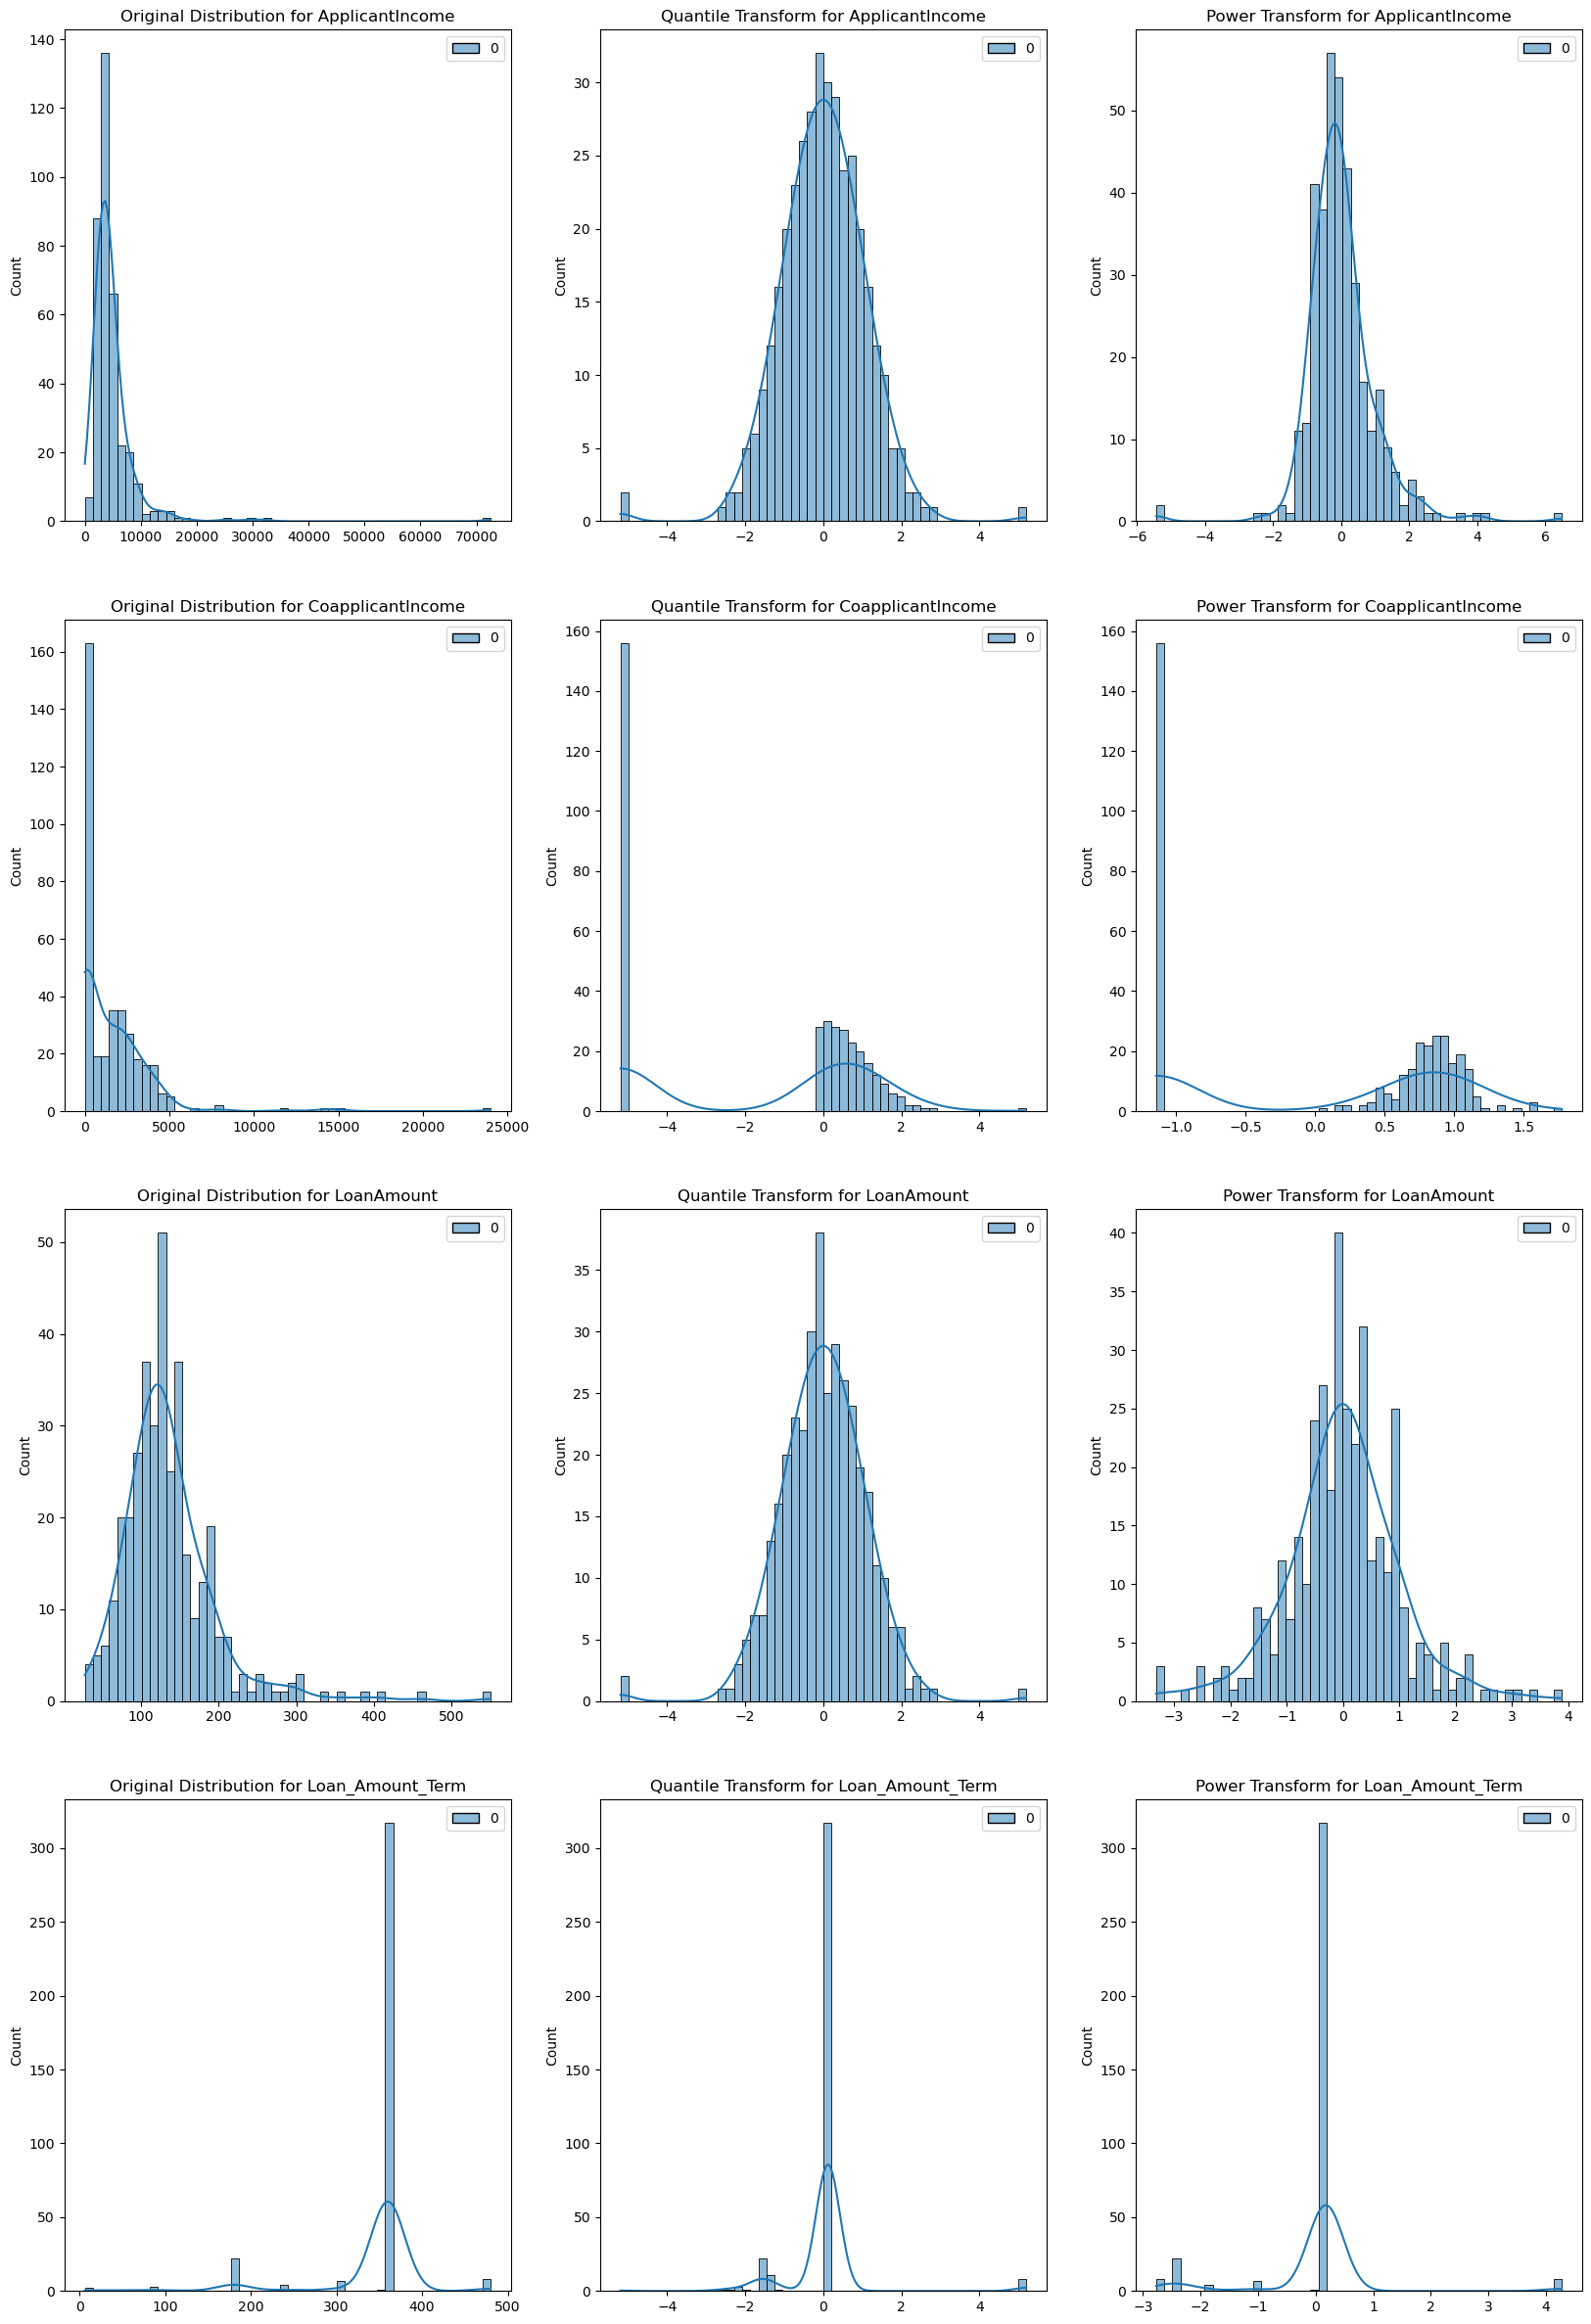

In [114]:
cols1 = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
def test_transformers(columns):
    pt = PowerTransformer()
    qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
    fig = plt.figure(figsize=(20,30))
    j = 1
    for i in columns:
        array = np.array(data_test[i]).reshape(-1, 1)
        y = pt.fit_transform(array)
        x = qt.fit_transform(array)
        plt.subplot(4,3,j)
        sns.histplot(array, bins = 50, kde = True)
        plt.title(f"Original Distribution for {i}")
        plt.subplot(4,3,j+1)
        sns.histplot(x, bins = 50, kde = True)
        plt.title(f"Quantile Transform for {i}")
        plt.subplot(4,3,j+2)
        sns.histplot(y, bins = 50, kde = True)
        plt.title(f"Power Transform for {i}")      
        j += 3
        data_test[i]=x
test_transformers(cols1)

In [115]:
for i in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']:
    data_skew=data[i].skew()
    print(data_skew)
#positively skewd data can be converted to a gaussian cureve using logtransformation or sqrt method

#But with negatively skewed data this is not apt

-0.005627414484905382
-0.13153229133901018
-0.0009375082605279191
2.34634627939854


### Outlier detection

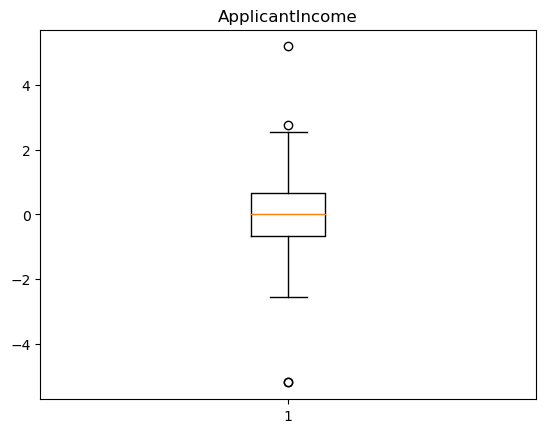

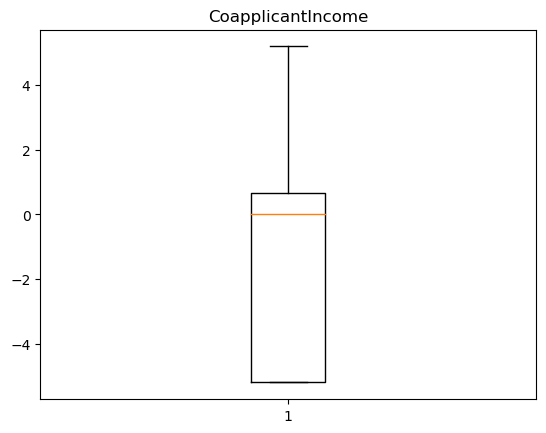

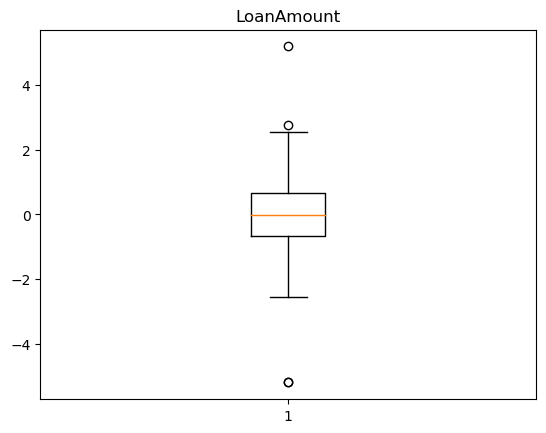

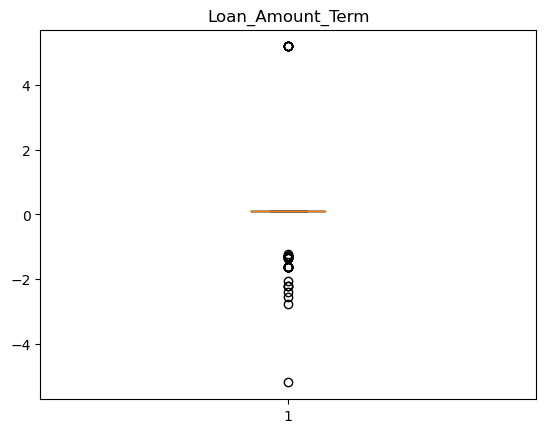

In [116]:
for features in numerical_test:
        plt.boxplot(data_test[features])
        plt.title(features)
        plt.show()
        

In [117]:
# there are outliers in each numerical columns... But not removing as row values canot be dropped

#There are ouliers for the numerical features





### Label encoding

In [118]:
from sklearn.preprocessing import  LabelEncoder

le=LabelEncoder()


for i in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']:
    data_test[i] = le.fit_transform(data_test[i])


In [119]:
data_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,0.863290,-5.199338,-0.408291,0.120141,1.0,2
1,1,1,1,0,0,-0.499416,0.154711,0.044531,0.120141,1.0,2
2,1,1,2,0,0,0.632099,0.342147,1.410236,0.120141,1.0,2
3,1,1,2,0,0,-1.120983,0.722568,-0.722568,0.120141,1.0,2
4,1,0,0,1,0,-0.353060,-5.199338,-1.267664,0.120141,1.0,2


In [120]:
data_test1=data_test.drop(['Gender','Married','Dependents','Education','Self_Employed','Property_Area'],axis=1)

In [121]:
data_test2=data_test[['Gender','Married','Dependents','Education','Self_Employed','Property_Area']]

In [122]:
data_test1.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [123]:
### Scaling

In [124]:
from sklearn.preprocessing import MinMaxScaler

In [125]:
minmax=MinMaxScaler(feature_range= (0,1))
data_test3=minmax.fit_transform(data_test1)

In [126]:
data_test3=pd.DataFrame(data_test3, columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History'])

In [127]:
data_test3

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.583019,0.000000,0.460736,0.511553,1.0
1,0.451973,0.514878,0.504282,0.511553,1.0
2,0.560786,0.532903,0.635617,0.511553,1.0
3,0.392199,0.569487,0.430513,0.511553,1.0
4,0.466048,0.000000,0.378094,0.511553,1.0
...,...,...,...,...,...
362,0.514545,0.531510,0.465697,0.511553,1.0
363,0.521923,0.490765,0.468838,0.511553,1.0
364,0.463229,0.538549,0.504282,0.511553,1.0
365,0.560786,0.561189,0.566109,0.511553,1.0


In [128]:
data_test3=pd.DataFrame(data_test3,columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'])

In [129]:
data_test3.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.583019,0.000000,0.460736,0.511553,1.0
1,0.451973,0.514878,0.504282,0.511553,1.0
2,0.560786,0.532903,0.635617,0.511553,1.0
3,0.392199,0.569487,0.430513,0.511553,1.0
4,0.466048,0.000000,0.378094,0.511553,1.0


In [130]:
#concatenating target & encoded columns with scaled columns.
data_test3 =pd.concat([data_test2,data_test3], axis =1)

In [131]:
data_test3.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,1,0,0,0,2,0.583019,0.000000,0.460736,0.511553,1.0
1,1,1,1,0,0,2,0.451973,0.514878,0.504282,0.511553,1.0
2,1,1,2,0,0,2,0.560786,0.532903,0.635617,0.511553,1.0
3,1,1,2,0,0,2,0.392199,0.569487,0.430513,0.511553,1.0
4,1,0,0,1,0,2,0.466048,0.000000,0.378094,0.511553,1.0


### Y Predictions Using the model with highest accuracy ie SVM(Support Vector Machine with "Poly" Kernal)

In [132]:
y_pred_svmp=svm_clf2.predict(data_test3)

In [133]:
y_pred_svmp

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [134]:
# Create New Data with Loan_ID and predicted Loan_Status 

result_data = {"Loan_ID": test_data["Loan_ID"], "Loan_Status": y_pred_svmp}



# Creating Dataframe

df = pd.DataFrame(result_data, columns=["Loan_ID", "Loan_Status"])


# Replacing the values of Loan Status with predicted values 

df["Loan_Status"].replace(0,"N",inplace=True)
df["Loan_Status"].replace(1,"Y",inplace=True)


# Converting Dataframe to csv file
 
df.to_csv("Samplesubmission_Muneera1.csv", index = False)
